In [253]:
from nltk.tokenize import WordPunctTokenizer
word_punct_tokenizer = WordPunctTokenizer()

In [254]:
from nltk.corpus import stopwords
stop_words = stopwords.words('french')
stop_words.append('les')

In [255]:
'l' in stop_words

True

In [256]:
'd' in stop_words

True

In [257]:
'en' in stop_words

True

In [258]:
'par' in stop_words

True

In [259]:
'que' in stop_words

True

In [260]:
"qu'" in stop_words

False

In [261]:
punctations = ['"', ',', '.', ':', "'", "(", ")", "/", "*", "...", u"«", u"»"]

In [262]:
import nltk

def normalize(w):
    w = w.replace("d'", "").replace("l'", "").replace("qu'", "")
    if '-' not in w:
        if w not in punctations and w not in stop_words:
            return w
        else:
            return None
    else:
        return w

def tokenize(text):
    text = text.lower()
    text = text.replace(u"’", "'")
#     words = word_punct_tokenizer.tokenize(text)
#     print words
    words = nltk.word_tokenize(text)
    return [normalize(w) for w in words if normalize(w) is not None]

In [263]:
tokenize(u"Ile-de-France")

[u'ile-de-france']

In [264]:
print tokenize(u"Taux de chômage selon le sexe et l'âge, au premier trimestre 2017")

[u'taux', u'ch\xf4mage', u'selon', u'sexe', u'\xe2ge', u'premier', u'trimestre', u'2017']


In [265]:
print tokenize(u"Taux de chômage localisés par sexe et âge en moyenne annuelle en 2015")

[u'taux', u'ch\xf4mage', u'localis\xe9s', u'sexe', u'\xe2ge', u'moyenne', u'annuelle', u'2015']


## Bigram

In [266]:
html_table_titles_file = '../../data/html_table_titles.txt'

In [267]:
import codecs
from gensim.models import Phrases

documents = list()
with codecs.open(html_table_titles_file, 'r', 'utf-8') as f:
    documents = f.read().splitlines()
    
sentence_stream = [tokenize(doc) for doc in documents]
phrase_detector = Phrases(sentence_stream, min_count=5, threshold=3)

In [268]:
list_sentence_to_bigrams = [' '.join(phrase_detector[list_words]) for list_words in sentence_stream]
text = ' '.join(list_sentence_to_bigrams)

## Word cloud

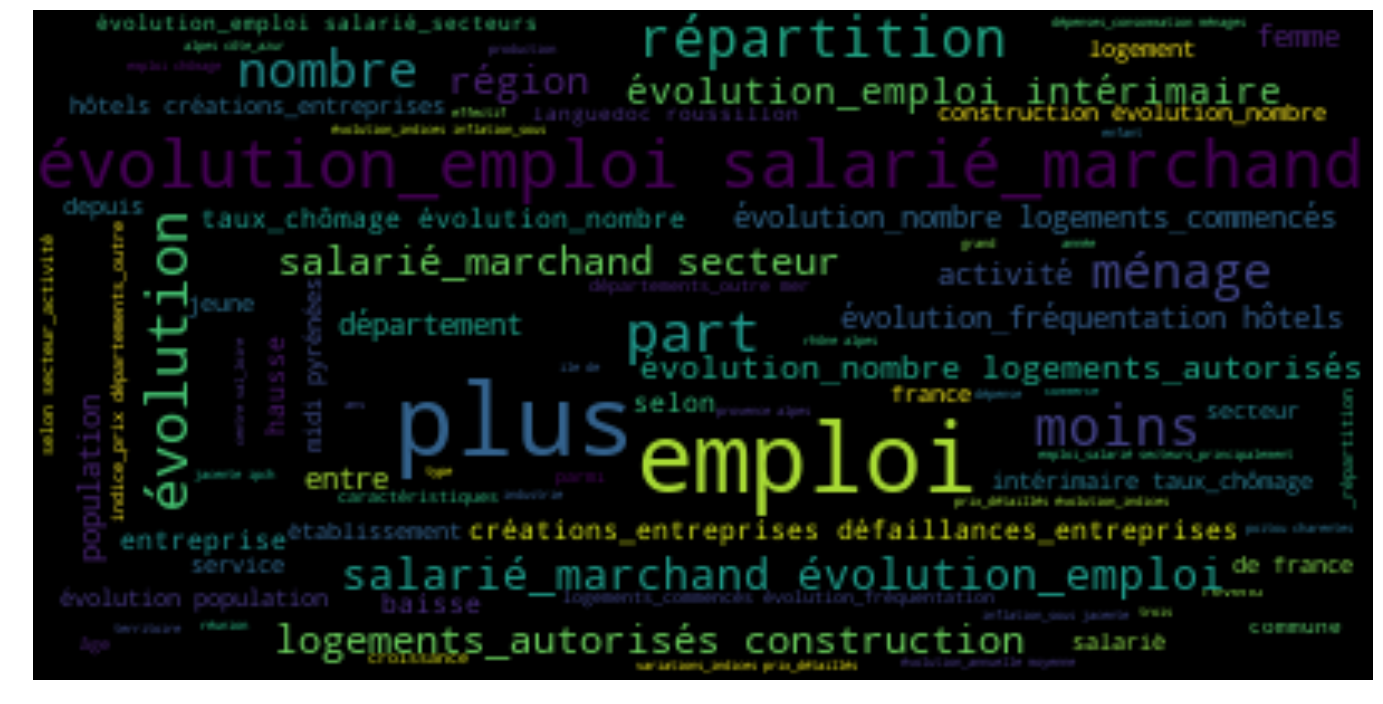

In [269]:
from os import path
from wordcloud import WordCloud
import codecs

# Generate a word cloud image
wordcloud = WordCloud(max_words=4).generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt

# lower max_font_size
wordcloud = WordCloud(max_font_size=30).generate(text)
plt.figure(figsize=(24, 24))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [270]:
all_terms = set()
for list_words in sentence_stream:
    all_terms.update(set(phrase_detector[list_words]))
len(all_terms)

8006

In [272]:
tokenize(u"Le PIB et ses composantes en volumes chaînés")

[u'pib', u'composantes', u'volumes', u'cha\xeen\xe9s']

In [273]:
'le' in all_terms

False

In [274]:
'l' in all_terms

False

In [275]:
'de' in all_terms

False

In [276]:
all_bigrams = list((bigram for bigram in all_terms if '_' in bigram))
len(all_bigrams)

1774

In [277]:
for bigram in all_bigrams:
    print bigram

fin_études
cvs-cjo_brutes*
internet_cours
coût_entretien-amélioration
taux_recours
industrie_agroalimentaire
activité_formes
2008_2011
2008_2013
hors_intérim
jusen_2015
aires_urbaines
régions_françaises
électricité_secteur
femmes_société
février_2016
moteur_croissance
entre_2010
septembre_2015
mobile_quelques
type_contrat
dépenses_culturelles
principaux_résultats
immatriculations_sociétés
trois_principales
rdb_ratios
auto-entrepreneurs_démarré
hors_auto-entreprises
privés_1er
emplois_salariés
centre-val_loire
zonage_aires
population_2050
part_navetteurs
dépenses_pensions
4e_trimestre
effectifs_fonction
produits_alimentaires
évolution_surface
moyen_maisons
coût_horaire
structure_financement
températures_période
plus_peuplées
matières_premières
région_ile-de-france
b_données
région_champagne-ardenne
étudiants_enseignement
000_emplois
séniors_entre
recrutement*_bâtiment
avril_2016
endettement_agents
taux_accroissement
plus_grandes
production_réserves
transport_principal
déficits_bilatérau

In [278]:
for bigram in all_bigrams:
    if 'selon' in bigram:
        print bigram

selon_nationalité
selon_taille
agricoles_selon
selon_provenance
selon_distance
individus_selon
selon_lieu
selon_sexe
selon_statut
selon_forme
selon_constructeur
résidentiels_selon
surpeuplement_selon
pauvreté_selon
selon_catégorie
selon_destination
multimédia_selon
artisanales_selon
selon_dimension
selon_âge
condamnations_selon
selon_zonage
selon_type
selon_rang
selon_origine
selon_nature
selon_appartenance


In [279]:
for bigram in all_bigrams:
    if '2016' in bigram:
        print bigram

février_2016
avril_2016
2016_comparaisons
octobre_2016
juin_2016
juillet_2016
mars_2016
2016indice_prix
janvier_2016
saison_2016
novembre_2016
mai_2016


In [284]:
for bigram in all_bigrams:
    if u'chômeur' in bigram:
        print bigram

chômeurs_taux
nombre_chômeurs
